In [1]:
#IMPORTS
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_base = "../Data/"
path = path_base+"phantom_head_test.csv"
# Define the header to search for
header_to_find = "Frame,Time (Seconds),X,Y,Z,X,Y,Z"

In [3]:
def extract_frame_rate(file_path):
    # Initialize the frame rate variable
    frame_rate = None
    
    # Open the file and read its lines
    with open(file_path, 'r') as file:
        for line in file:
            # Strip leading/trailing whitespace and split the line by commas
            line_parts = line.strip().split(',')
            
            # Check if the line contains "Frame Rate,"
            for i in range(len(line_parts)):
                if line_parts[i] == "Capture Frame Rate":
                   #print(i, "found it")
                   # Extract the frame rate data
                   frame_rate_data = line_parts[i+1]
                   
                   # Convert the frame rate data to the appropriate type (e.g., float)
                   # Adjust this conversion based on the format of your frame rate data
                   frame_rate = float(frame_rate_data)
                   
                   # Break out of the loop since we found the frame rate
                   break
    return frame_rate

In [4]:
# Example usage:
file_path = path  # Replace 'your_file.csv' with the path to your file
frame_rate = extract_frame_rate(file_path)
print("Frame Rate:", frame_rate)


Frame Rate: 240.0


In [5]:
num_meta_rows = 6 
df = pd.read_csv(path, skiprows=num_meta_rows)

new_header = ["Frame", "Time", "X_rot","Y_rot","Z_rot","X_trans","Y_trans","Z_trans"]
df.columns = new_header
# Display the DataFrame
print(df)

      Frame       Time     X_rot      Y_rot     Z_rot     X_trans     Y_trans  \
0         0   0.000000  0.212639  -0.043943  0.111171  880.172729  599.470642   
1         1   0.004167  0.209623  -0.050671  0.103742  880.170776  599.473938   
2         2   0.008333  0.225792  -0.042760  0.111942  880.165466  599.474792   
3         3   0.012500  0.212572  -0.052128  0.109203  880.166870  599.481812   
4         4   0.016667  0.215723  -0.052090  0.106931  880.166992  599.478699   
...     ...        ...       ...        ...       ...         ...         ...   
3200   3200  13.333333 -1.646888 -27.373987 -3.555696  870.749634  599.462708   
3201   3201  13.337500 -1.654215 -27.344988 -3.601812  870.763367  599.469177   
3202   3202  13.341667 -1.662312 -27.345415 -3.607169  870.761353  599.468689   
3203   3203  13.345833 -1.640919 -27.365381 -3.546306  870.747925  599.464966   
3204   3204  13.350000 -1.636967 -27.365955 -3.549008  870.750122  599.462463   

         Z_trans  
0     25

In [6]:
# Set the initial translation to 0
translations = ["X_trans", "Y_trans","Z_trans"]
for t in translations:
    df[t] = df[t].subtract(df.iloc[0][t])
print(df)

      Frame       Time     X_rot      Y_rot     Z_rot   X_trans   Y_trans  \
0         0   0.000000  0.212639  -0.043943  0.111171  0.000000  0.000000   
1         1   0.004167  0.209623  -0.050671  0.103742 -0.001953  0.003296   
2         2   0.008333  0.225792  -0.042760  0.111942 -0.007263  0.004150   
3         3   0.012500  0.212572  -0.052128  0.109203 -0.005859  0.011170   
4         4   0.016667  0.215723  -0.052090  0.106931 -0.005737  0.008057   
...     ...        ...       ...        ...       ...       ...       ...   
3200   3200  13.333333 -1.646888 -27.373987 -3.555696 -9.423095 -0.007934   
3201   3201  13.337500 -1.654215 -27.344988 -3.601812 -9.409362 -0.001465   
3202   3202  13.341667 -1.662312 -27.345415 -3.607169 -9.411376 -0.001953   
3203   3203  13.345833 -1.640919 -27.365381 -3.546306 -9.424804 -0.005676   
3204   3204  13.350000 -1.636967 -27.365955 -3.549008 -9.422607 -0.008179   

       Z_trans  
0     0.000000  
1     0.003143  
2    -0.018524  
3    -0

In [7]:
def find_closest_index(df, target_value):
    # Get the first column of the DataFrame
    first_column = df.iloc[:, df.columns.get_loc("Time")]
    
    # Calculate the absolute differences between each entry and the target value
    absolute_differences = abs(first_column - target_value)
    
    # Find the index of the entry with the smallest absolute difference
    closest_index = absolute_differences.idxmin()
    
    return closest_index

def get_frames(df, f, total_frames):
    new_df = pd.DataFrame(columns=df.columns)

    t_between_frames = 1/f
    target_frames = [i * t_between_frames for i in range(total_frames)]
    for i in range(len(target_frames)):
      idx = find_closest_index(df,target_frames[i])
      #print(type(df.iloc[idx]))
      new_df.loc[len(new_df)] = df.iloc[idx]

    return new_df
    




In [8]:
# Filter out the needed motion frames
num_frames = print(df.shape[0])
delay = 0 #used to align the tracking with the timing of the arduino
f = 0.8 #frequency at which motion samples have been taken, used to align our tracking data with others'


df = get_frames(df, 30,100)
df



3205


,Frame,Time,X_rot,Y_rot,Z_rot,X_trans,Y_trans,Z_trans
0,0.0,0.000000,0.212639,-0.043943,0.111171,0.000000,0.000000,0.000000
1,8.0,0.033333,0.009432,0.013826,0.031015,0.039795,-0.219665,0.267334
2,16.0,0.066667,0.062520,0.062572,0.232713,-0.001403,-0.124573,0.148682
3,24.0,0.100000,0.074253,-0.097147,-0.304579,0.056885,-0.182068,0.195557
4,32.0,0.133333,0.014291,0.014702,0.027373,0.039551,-0.218262,0.259766
...,...,...,...,...,...,...,...,...
95,760.0,3.166667,5.094998,-13.703229,4.662896,-16.539916,33.767029,-11.673981
96,768.0,3.200000,4.011363,-14.766272,4.762102,-16.197753,40.246521,-12.357986
97,776.0,3.233333,3.325055,-15.081022,3.477992,-14.680725,49.953430,-12.531891
98,784.0,3.266667,2.923999,-15.419146,3.268080,-12.613708,60.801575,-11.071289


In [9]:
columns_to_invert = ["X_rot","Y_rot","X_trans","Z_trans"]
df.loc[:, columns_to_invert] *= -1

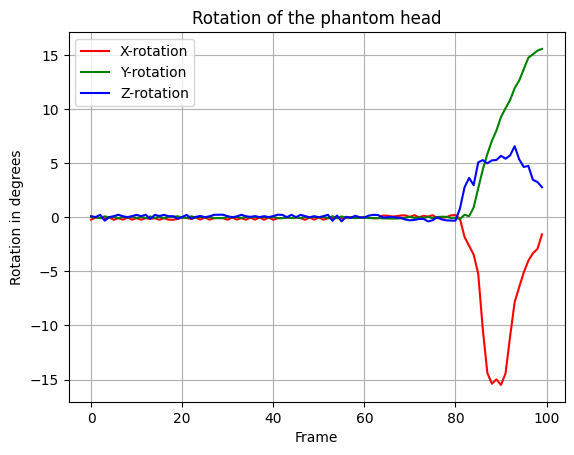

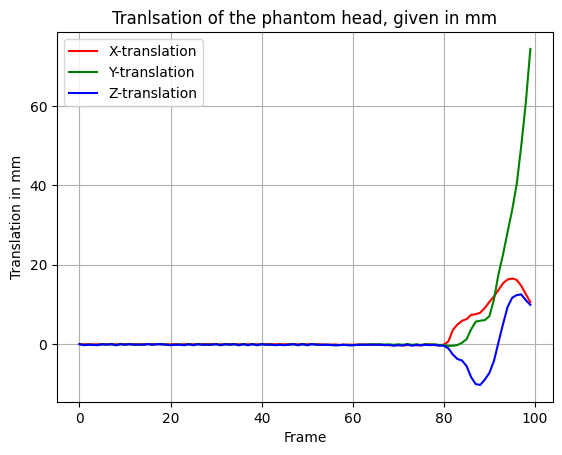

In [10]:
plt.figure()
plt.title("Rotation of the phantom head")
plt.plot(df.loc[:,"X_rot"], c = "r",label = "X-rotation")
plt.plot(df.loc[:,"Y_rot"], c = "g",label = "Y-rotation")
plt.plot(df.loc[:,"Z_rot"], c = "b",label = "Z-rotation")
plt.ylabel("Rotation in degrees")
plt.xlabel("Frame")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.title("Tranlsation of the phantom head, given in mm")
plt.plot(df.loc[:,"X_trans"], c = "r",label = "X-translation")
plt.plot(df.loc[:,"Y_trans"], c = "g",label = "Y-translation")
plt.plot(df.loc[:,"Z_trans"], c = "b",label = "Z-translation")
plt.ylabel("Translation in mm")
plt.xlabel("Frame")
plt.legend()
plt.grid()
plt.show()


In [11]:
#Load and check person data from FM (10 people total)
# DATA given as XYZ translation in mm and XYZ rotation in degrees. First frame set to be 0 in all (using Tracoline)
f9 = np.load(path_base+"f9.npz")["arr_0"]
f10 = np.load(path_base+"f10.npz")["arr_0"]
m9 = np.load(path_base+"m9.npz")["arr_0"]
m10 = np.load(path_base+"m10.npz")["arr_0"]


print(f9.shape)
print(f10.shape)
print(m9.shape)
print(m10.shape)

(3, 380, 6)
(2, 380, 6)
(3, 380, 6)
(2, 380, 6)


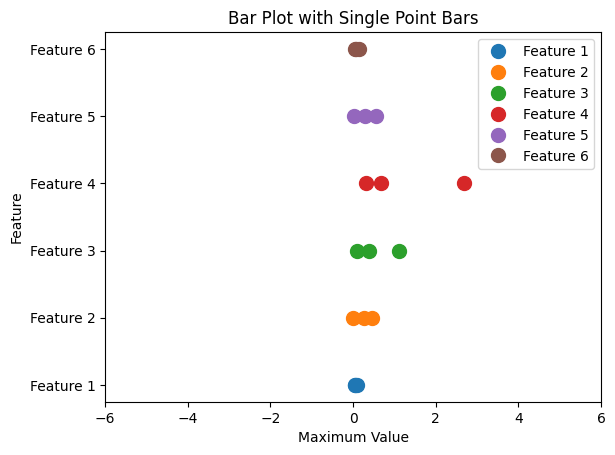

In [12]:
max_f9 = np.max(f9, axis = 1)
min_f9 = np.min(f9, axis = 1)
max_f10 = np.max(f10, axis = 1)
min_f10 = np.min(f10, axis = 1)
max_m9 = np.max(m9, axis = 1)
min_m9 = np.min(m9, axis = 1)
max_m10 = np.max(m10, axis = 1)
min_m10 = np.max(m10, axis = 1)

# Transpose the data so that features are on the x-axis
max_values_per_person_transposed = max_f9.T

# Generate x values for features
y_values = np.arange(len(max_values_per_person_transposed))

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot a bar plot with single points
for i, feature_data in enumerate(max_values_per_person_transposed):
    ax.plot(feature_data, [i]*len(feature_data), marker='o', linestyle='', markersize=10, label=f'Feature {i+1}')

# Set labels and title
ax.set_ylabel('Feature')
ax.set_xlabel('Maximum Value')
ax.set_title('Bar Plot with Single Point Bars')

# Set yticks and yticklabels
ax.set_yticks(np.arange(len(max_values_per_person_transposed)))
ax.set_yticklabels([f'Feature {i+1}' for i in range(len(max_values_per_person_transposed))])

# Show legend
ax.legend()
plt.xlim([-6,6])

# Show plot
plt.show()


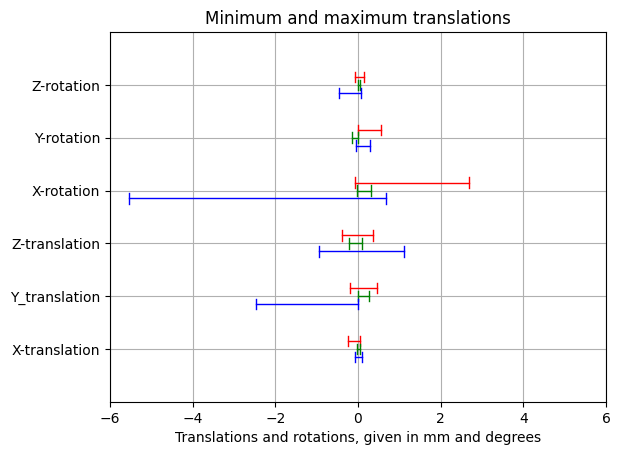

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# Define feature labels
feature_labels = ['X-translation', 'Y_translation', 'Z-translation', 'X-rotation', 'Y-rotation', 'Z-rotation']

# Plotting
fig, ax = plt.subplots()

color = ["r","g","b"]
for i in range(6): #feature
    people = f9.shape[0]
    offset = 0.3/(people-1)
    for j in range(f9.shape[0]):#person
        ax.plot([min_f9[j,i], max_f9[j,i]], [i+0.15-offset*j, i+0.15-offset*j], color=color[j], linestyle='-', linewidth=1)  # Interval line
        ax.plot([min_f9[j,i], min_f9[j,i]], [i+0.15-offset*j-0.1, i+0.15-offset*j+0.1], color=color[j], linestyle='-', linewidth=1)  # Start horizontal line
        ax.plot([max_f9[j,i], max_f9[j,i]], [i+0.15-offset*j-0.1, i+0.15-offset*j+0.1], color=color[j], linestyle='-', linewidth=1)  # End horizontal line


# # Plot intervals for each feature
# for i, (min_val, max_val) in enumerate(zip(min_values, max_values)):
#     ax.plot([min_val, max_val], [i, i], color='blue', linestyle='-', linewidth=2)  # Interval line
#     ax.plot([min_val, min_val], [i-0.1, i+0.1], color='blue', linestyle='-', linewidth=2)  # Start horizontal line
#     ax.plot([max_val, max_val], [i-0.1, i+0.1], color='blue', linestyle='-', linewidth=2)  # End horizontal line

# Set y-axis labels
ax.set_yticks(range(len(feature_labels)))
ax.set_yticklabels(feature_labels)

# Set x-axis label and limits
ax.set_xlabel('Translations and rotations, given in mm and degrees')
ax.set_xlim([-6,6])
ax.set_ylim([-1,6])

# Set title and grid
ax.set_title('Minimum and maximum translations')
ax.grid(True)

plt.show()

[-0.330214 -2.465026 -0.941532 -5.533569 -0.631801 -0.47057 ]
[0.167386 0.751653 3.856536 2.680239 0.55193  0.815376]


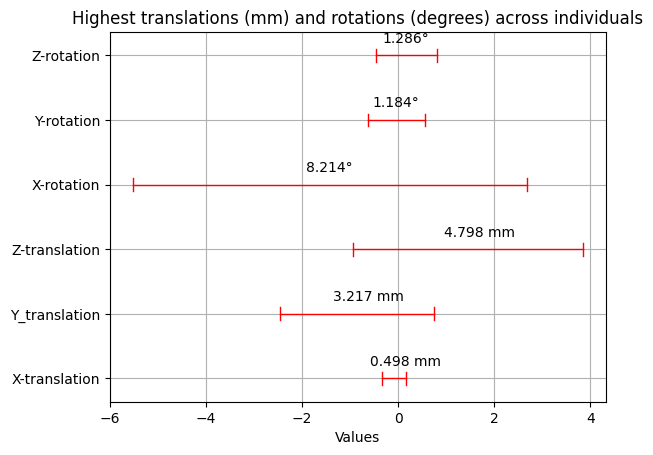

In [14]:
# Min/Max interval achieved across people
temp1 = np.concatenate((f9,f10),axis=0)
temp2 = np.concatenate((m9,m10),axis = 0)
data = np.concatenate((temp1,temp2),axis=0)

min_values = np.amin(data,axis=(0,1))
max_values = np.amax(data,axis=(0,1))
dif = max_values - min_values
print(min_values)
print(max_values)

fig, ax = plt.subplots()

for i in range(6): #feature
    if i < 3:
        plt.text((max_values[i]+min_values[i]-1)/2, i+0.2, "{:.3f}".format(dif[i])+" mm", fontsize=10, color='black')
    else:
        plt.text((max_values[i]+min_values[i]-1)/2, i+0.2, "{:.3f}".format(dif[i])+'\u00b0', fontsize=10, color='black')
    ax.plot([min_values[i], max_values[i]], [i, i], color=color[0], linestyle='-', linewidth=1)  # Interval line
    ax.plot([min_values[i], min_values[i]], [i-0.1, i+0.1], color=color[0], linestyle='-', linewidth=1)  # Start horizontal line
    ax.plot([max_values[i], max_values[i]], [i+-0.1, i+0.1], color=color[0], linestyle='-', linewidth=1)  # End horizontal line


ax.set_yticks(range(len(feature_labels)))
ax.set_yticklabels(feature_labels)

# Set x-axis label and limits
ax.set_xlabel('Values')
#ax.set_xlim([-6,6])
#ax.set_ylim([-1,6])

# Set title and grid
ax.set_title('Highest translations (mm) and rotations (degrees) across individuals')
ax.grid(True)

plt.show()

In [15]:
#Figure out the biggest difference in tracking that occurs across all people between

def max_dif(arr): 
  max = 0
  for i in range(len(arr)-1):
    cur_dif = abs(arr[i]+1 - arr[i+1])
    if cur_dif >= max:
      max = cur_dif
  return max


max_change = np.zeros((6))

for i in range(6):
  high = 0
  for j in range(data.shape[0]):
    cur = max_dif(data[j,:,i])
    if cur >= high:
      high = cur  
  max_change[i] = high
print("Highest change in rotation/translation between 2 frames:", max_change)

Highest change in rotation/translation between 2 frames: [1.214339 1.714566 4.17482  2.8628   1.418489 1.513599]


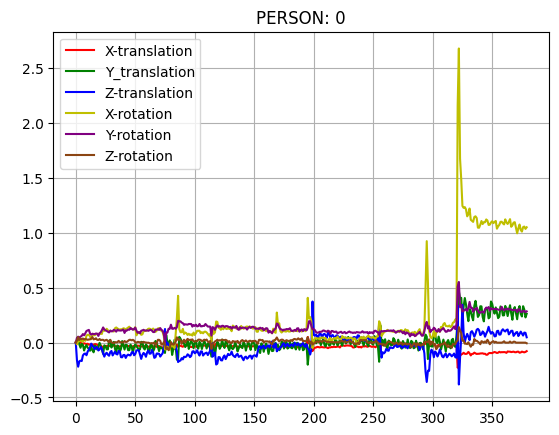

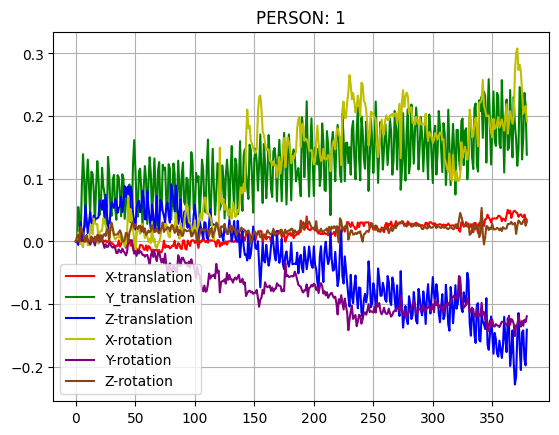

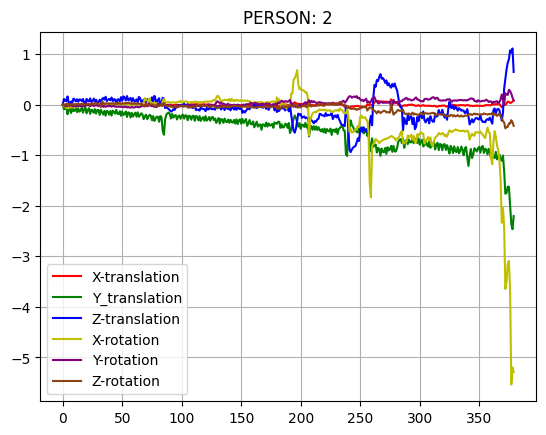

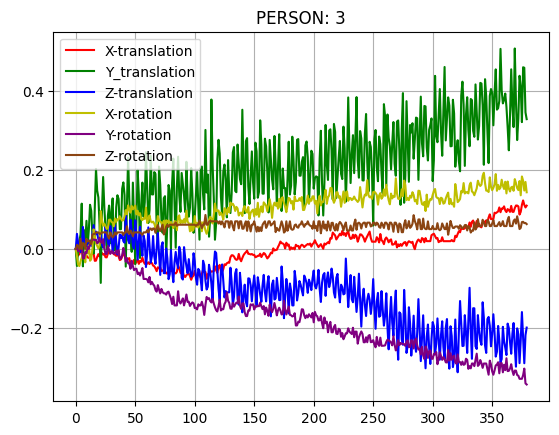

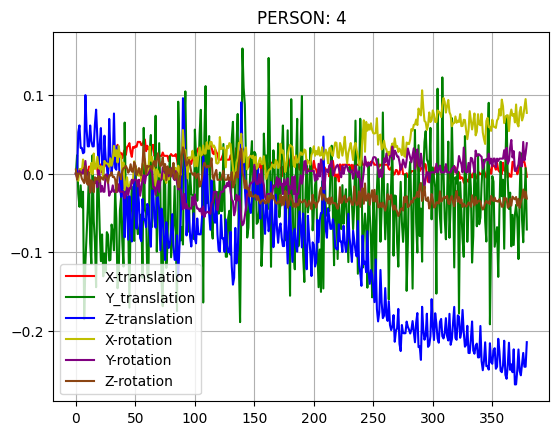

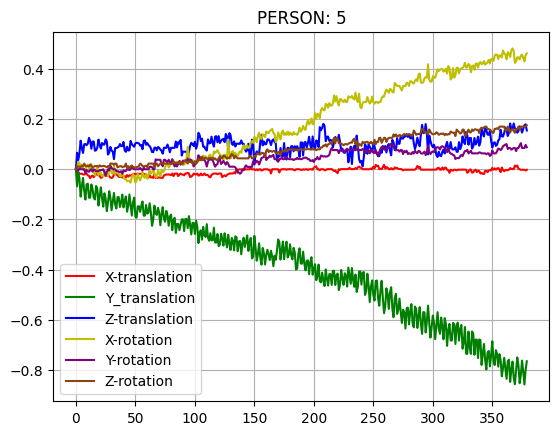

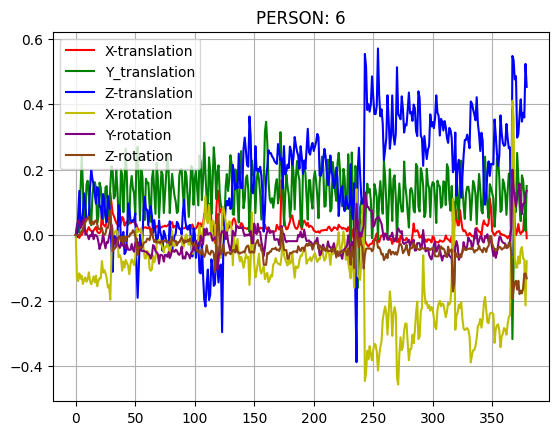

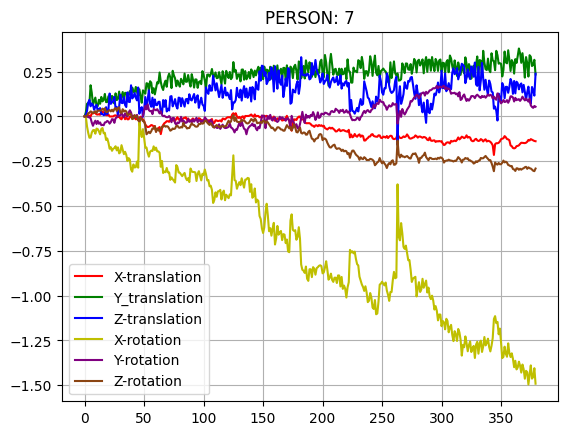

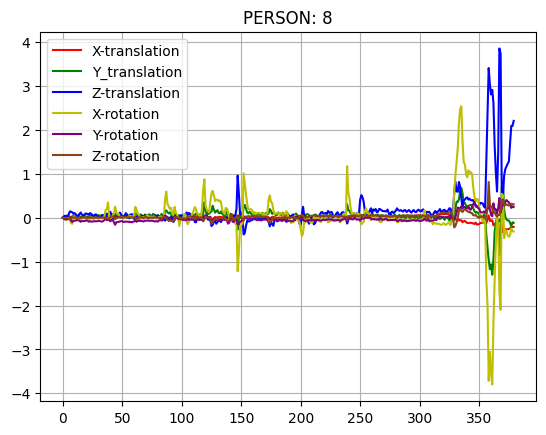

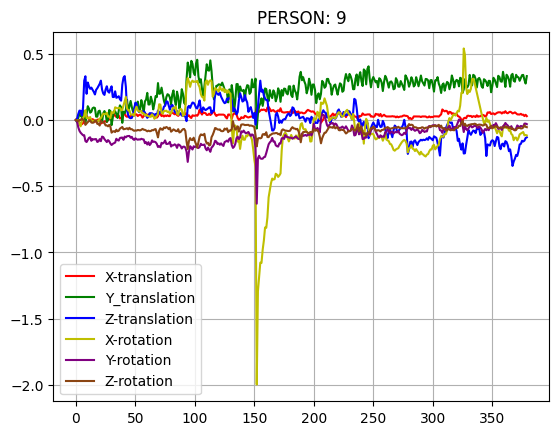

In [20]:
#Check if some combination of movement often occurs
plt.figure()
colors = ["r","g","b","y","purple","saddlebrown"]
x = np.arange(380)
for j in range(10):
  for i in range(6):
    plt.plot(x, data[j,:,i], color = colors[i], label = feature_labels[i])
  plt.title(f"PERSON: {j}")
  plt.legend()
  plt.grid()
  plt.show()

# PERSON 0:
# X rotate + Z translate occur together (when chin lifted (postive rotX), slides out scanner), also slight spike in Y-rot?
# 
